Wir fragen uns: Wie müssen wir die Stützstellen wählen, damit das Fehlerpolynom $w$ in der Supremumsnorm besonders klein wird? In der Vorlesung wird gezeigt: Dazu wählt man die Stützstellen als die Nullstellen der Tschebyscheff-Polynome
$$T_n(x)=\cos(n \arccos x).$$
Hierbei ist $\arccos x\in [0,\pi],$ und der $\arccos$ geht monoton von $0$ bis $1$.Das Argument des $\cos$ geht also von $0$ bis $n\pi$. Die Nullstellen des $\cos$ in diesem Bereich sind dann
$$\pi/2,\,\pi/2+\pi,\ldots,\pi/2+(n-1)\pi=\frac \pi 2 +k\pi=\frac {2k+1} 2 \pi, \,k=0\ldots n-1.$$
Die Nullstellen des Polynoms sind also die $x$ mit $$n\arccos x=\frac {2k+1} 2 \pi$$
oder $$x_k=\cos \bigl (\frac{2k+1} {2n} \pi \bigr),\,k=0\ldots n-1.$$
Wir plotten zunächst das Tschebyscheff-Polynom.

In [2]:
%%capture
%run Polynominterpolation.ipynb

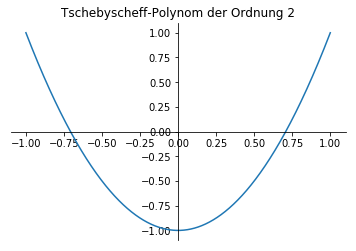

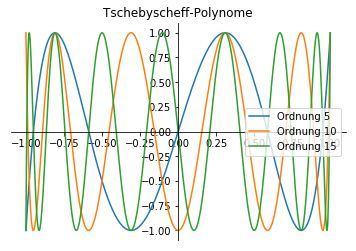

In [7]:
def tscheb(n,x):
    return math.cos(n*math.acos(x))
X=np.linspace(-1,1,1024)
Y2=[tscheb(2,z) for z in X]
Y5=[tscheb(5,z) for z in X]
Y10=[tscheb(10,z) for z in X]
Y15=[tscheb(15,z) for z in X]
plt.plot(X,Y2)
ax=plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title('Tschebyscheff-Polynom der Ordnung 2');
plt.figure()
plt.plot(X,Y5,X,Y10,X,Y15)
ax=plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.legend(['Ordnung 5','Ordnung 10','Ordnung 15'])
plt.title('Tschebyscheff-Polynome');

Wir vergleichen das normierte Tschebyscheff-Polynom der Ordnung 10 mit dem $w(x)$ bei 10 äquidistanten Stützstellen.

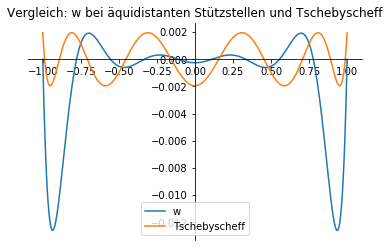

In [3]:
aequi=np.linspace(-1,1,10)
w=1
for z in aequi:
    w=w*(z-x)
Yaequi=[w.subs(x,z) for z in X]
plt.plot(X,Yaequi,X,np.array(Y10)/(2**9))
ax=plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title('Vergleich: w bei äquidistanten Stützstellen und Tschebyscheff')
plt.legend(['w','Tschebyscheff']);

Interpretation: Wir verlieren in der Mitte ein bisschen an Genauigkeit, aber dafür gewinnen wir am Rand enorm dazu.

Die Nullstellen der Polynome sind, wie oben bemerkt, die Auswertungen des Cosinus an äuidistanten Stellen in $[0,\pi]$. $\cos \varphi$ ist die $x$-Koordinate eines Einheitsvektors mit Winkel $\varphi$ gegen die $x$-Achse. Wir können die Nullstellen also einfach zeichnerisch ermitteln.

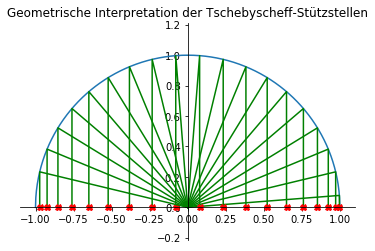

In [4]:
YC=[math.sqrt(1-z*z) for z in X]
plt.plot(X,YC)
ax=plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
n=20
t=[]
for k in range(0,n-1):
    z=math.cos((2*k+1)/(2*n)*math.pi)
    plt.plot([z,z,0],[0,math.sqrt(1-z*z),0],'green')
    plt.plot(z,0,'Xr')
    t.append(z)
plt.axis('equal');
plt.title('Geometrische Interpretation der Tschebyscheff-Stützstellen');

Wir bemerken: Diese Wahl der Stützstellen führt zu einer Verdichtung der Stützstellen am Rand des Intervalls. Wir wählen nun für die Interpolation des Runge-Beispiels die Tschebyscheff-Stützstellen.

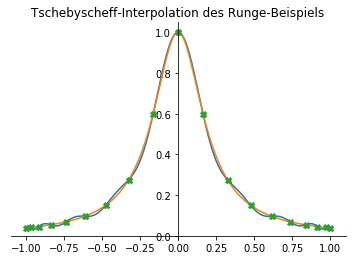

In [5]:
def tscheb_stuetz(n):
    x=[(2*i+1)/(2*n)*math.pi for i in range(0,n)]
    t=[math.cos(z) for z in x]
    return t

t=tscheb_stuetz(n-1)
runge=1/(1+25*x*x)
y=[float(runge.subs(x,z)) for z in t]
t=np.array(t)
p=poly_coeff(t,y)
YP=[np.polyval(p,z) for z in X]
Y=[runge.subs(x,z) for z in X]
plt.plot(X,YP,X,Y,t,y,'X')
ax=plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title('Tschebyscheff-Interpolation des Runge-Beispiels');